# IGNORE THIS NOTEBOOK, NOT CONCLUSIVE

In [116]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AR as AutoRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df_chatelet = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/qualite-de-lair-mesuree-dans-la-station-chatelet.csv", sep=";")

In [118]:
def date_formatting_other(timestamp):
    timestamp = str(timestamp)
    timestamp=timestamp[:19]
    return datetime.strptime(timestamp,"%Y-%m-%dT%H:%M:%S")

df_chatelet['DATE/HEURE'] = df_chatelet['DATE/HEURE'].apply(lambda x: date_formatting_other(x))
df_chatelet['NO'].replace({"<2": "2", "ND":"0", "nan":None}, inplace=True)
df_chatelet = df_chatelet.dropna()
col = ['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']
for i in col:
  df_chatelet[i] = pd.to_numeric(df_chatelet[i], errors='coerce')

df_chatelet.sort_values(by = 'DATE/HEURE', ascending=True, inplace = True)
df_chatelet['CO2'] = df_chatelet['CO2'].fillna(df_chatelet['CO2'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['TEMP'] = df_chatelet['TEMP'].fillna(df_chatelet['TEMP'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['HUMI'] = df_chatelet['HUMI'].fillna(df_chatelet['HUMI'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['NO2'] = df_chatelet['NO2'].fillna(df_chatelet['NO2'].interpolate().fillna(method="backfill", axis=None))
df_chatelet['PM10'] = df_chatelet['PM10'].fillna(df_chatelet['PM10'].interpolate().fillna(method="backfill", axis=None))
df_chatelet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
76869,2013-01-01 02:00:00,6,31.0,182.0,776.0,21.0,47.000000
76868,2013-01-01 03:00:00,6,30.0,166.0,800.0,21.0,47.000000
76867,2013-01-01 04:00:00,4,27.0,124.0,799.0,21.0,47.000000
76866,2013-01-01 05:00:00,3,25.0,85.0,715.0,21.0,46.666667
76865,2013-01-01 06:00:00,4,26.0,102.0,622.0,21.0,46.333333
...,...,...,...,...,...,...,...
4,2021-10-17 22:00:00,3,20.0,79.0,567.0,20.0,42.000000
3,2021-10-17 23:00:00,4,20.0,62.0,518.0,20.0,42.000000
2,2021-10-18 00:00:00,4,23.0,47.0,497.0,20.0,42.000000
1,2021-10-18 01:00:00,4,21.0,37.0,474.0,20.0,42.000000


In [119]:
df_chatelet.isna().sum()

DATE/HEURE    0
NO            0
NO2           0
PM10          0
CO2           0
TEMP          0
HUMI          0
dtype: int64

In [120]:
df_chatelet.dtypes

DATE/HEURE    datetime64[ns]
NO                     int64
NO2                  float64
PM10                 float64
CO2                  float64
TEMP                 float64
HUMI                 float64
dtype: object

In [121]:
data_chatelet = df_chatelet.drop(['DATE/HEURE'], axis=1)
data_chatelet.index = df_chatelet["DATE/HEURE"]
data_chatelet.index

DatetimeIndex(['2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               '2013-01-01 10:00:00', '2013-01-01 11:00:00',
               ...
               '2021-10-17 17:00:00', '2021-10-17 18:00:00',
               '2021-10-17 19:00:00', '2021-10-17 20:00:00',
               '2021-10-17 21:00:00', '2021-10-17 22:00:00',
               '2021-10-17 23:00:00', '2021-10-18 00:00:00',
               '2021-10-18 01:00:00', '2021-10-18 02:00:00'],
              dtype='datetime64[ns]', name='DATE/HEURE', length=52166, freq=None)

In [122]:
cols = data_chatelet.columns
data_chatelet

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE/HEURE,,,,,,
2013-01-01 02:00:00,6,31.0,182.0,776.0,21.0,47.000000
2013-01-01 03:00:00,6,30.0,166.0,800.0,21.0,47.000000
2013-01-01 04:00:00,4,27.0,124.0,799.0,21.0,47.000000
2013-01-01 05:00:00,3,25.0,85.0,715.0,21.0,46.666667
2013-01-01 06:00:00,4,26.0,102.0,622.0,21.0,46.333333
...,...,...,...,...,...,...
2021-10-17 22:00:00,3,20.0,79.0,567.0,20.0,42.000000
2021-10-17 23:00:00,4,20.0,62.0,518.0,20.0,42.000000
2021-10-18 00:00:00,4,23.0,47.0,497.0,20.0,42.000000


In [123]:
time_to_predict = 24*1
useful_data = data_chatelet[:time_to_predict*30]
train = data_chatelet[:int(0.8*(len(data_chatelet)))]#data_chatelet[:int(0.8*(len(data_chatelet)))]
valid = data_chatelet[int(0.8*(len(data_chatelet))):]#data_chatelet[int(0.8*(len(data_chatelet))):]

In [124]:
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [125]:
prediction = model_fit.forecast(model_fit.y, steps=len(valid))
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(len(cols)):
    for i in range(len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
pred.index=valid.index
pred

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,NO,NO2,PM10,CO2,TEMP,HUMI
DATE/HEURE,,,,,,
2020-08-02 09:00:00,6.39748,13.9006,32.0885,415.233,21.6377,47.3398
2020-08-02 10:00:00,9.21898,15.6215,52.0816,429.717,21.6129,47.3437
2020-08-02 11:00:00,11.5787,17.1889,67.0071,443.29,21.5916,47.3455
2020-08-02 12:00:00,13.564,18.6229,78.2915,455.872,21.573,47.3454
2020-08-02 13:00:00,15.2423,19.939,86.9406,467.445,21.5569,47.3436
...,...,...,...,...,...,...
2021-10-17 22:00:00,24.873,35.849,129.183,572.492,21.176,44.4432
2021-10-17 23:00:00,24.873,35.849,129.183,572.492,21.176,44.4432
2021-10-18 00:00:00,24.873,35.849,129.183,572.492,21.176,44.4432


In [126]:
out = np.array(pred)
for i in range(len(cols)):
    print(str((mean_squared_error(out[:,i], valid[cols[i]]))**(1/2)), "\n"  )

26.420945143467247 

16.660086486382976 

77.61729531423423 

98.18352299536356 

3.7551727315306445 

12.126231572850784 



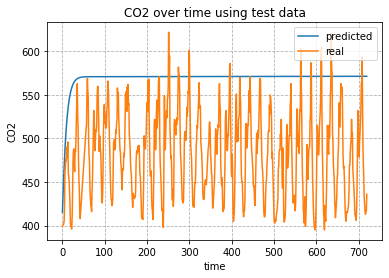

In [127]:
plt.plot(out[0:24*30,3], label="predicted")
plt.plot(valid["CO2"][0:24*30].reset_index(drop=True), label="real")
plt.title('CO2 over time using test data')
plt.xlabel('time')
plt.ylabel('CO2')
plt.legend(loc="upper right")
plt.grid(linestyle = '--')
plt.show()

In [128]:
out[:,3]

array([415.2327510545077, 429.7174119366599, 443.2895172752427, ...,
       572.4923221289013, 572.4923221290694, 572.4923221292372],
      dtype=object)

So what we've done above is trained a VAR model (equal to AR but with multiple variables) with all samples and then calculated errors on predictions in the validation set.

In [129]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data_chatelet);

In [130]:
clusters = []
for i in range(n_clusters):
  cluster = data_chatelet.iloc[kmeans.labels_==i]
  clusters.append(cluster)

In [131]:
for c_number in range(len(clusters)):
  train = clusters[c_number][:int(0.8*(len(clusters[c_number])))]#data_chatelet[:int(0.8*(len(data_chatelet)))]
  valid = clusters[c_number][int(0.8*(len(clusters[c_number]))):]#data_chatelet[int(0.8*(len(data_chatelet))):]
  from statsmodels.tsa.vector_ar.var_model import VAR
  model = VAR(endog=train)
  model_fit = model.fit()
  prediction = model_fit.forecast(model_fit.y, steps=len(valid))
  #converting predictions to dataframe
  pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
  for j in range(len(cols)):
      for i in range(len(prediction)):
        pred.iloc[i][j] = prediction[i][j]
  pred.index=valid.index
  out = np.array(pred)
  print("_______________ Cluster ", c_number, "_______________________________")
  for i in range(len(cols)):
      print('rmse value for ' + cols[i] + ' is : ' + str((mean_squared_error(out[:,i], valid[cols[i]]))**(1/2))   )

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


_______________ Cluster  0 _______________________________
rmse value for NO is : 47.359214195187484
rmse value for NO2 is : 14.672400473644263
rmse value for PM10 is : 103.38949236180225
rmse value for CO2 is : 85.70032467234144
rmse value for TEMP is : 3.998555968659733
rmse value for HUMI is : 9.151627888070166


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


_______________ Cluster  1 _______________________________
rmse value for NO is : 10.22780916951645
rmse value for NO2 is : 13.856869753272957
rmse value for PM10 is : 34.397693546177486
rmse value for CO2 is : 39.833192541399875
rmse value for TEMP is : 3.0894844296911557
rmse value for HUMI is : 12.484674618034216


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


_______________ Cluster  2 _______________________________
rmse value for NO is : 33.315483132633034
rmse value for NO2 is : 15.073944728796237
rmse value for PM10 is : 83.27473738645784
rmse value for CO2 is : 46.93516269571216
rmse value for TEMP is : 4.08805264460438
rmse value for HUMI is : 11.054357306647852
